In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns


In [17]:
dfHeartClassification = pd.read_csv("../data/heart.csv",sep=",")

In [18]:
str_values = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
encoder = LabelEncoder()
for value in str_values:
    dfHeartClassification[value] = encoder.fit_transform(dfHeartClassification[value])
dfHeartClassification.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [19]:
# Split Dataset on labels and features
x = dfHeartClassification.drop(['HeartDisease'], axis = 1)
y = dfHeartClassification['HeartDisease']


In [20]:
## Normalizing dataset
scaler = StandardScaler()

sc_x = scaler.fit_transform(x)
pca = PCA()
pca_x = pca.fit_transform(sc_x)
exp_var_ratio_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_ratio_pca)

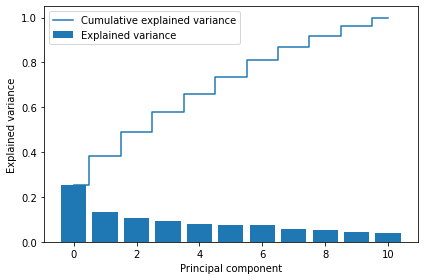

In [21]:
plt.bar(range(0,len(exp_var_ratio_pca)), exp_var_ratio_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [22]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(sc_x)

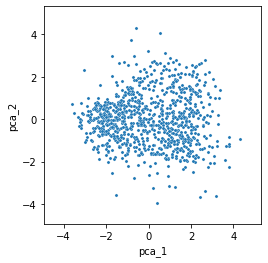

In [23]:
pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min() - 1, pca_result.max() + 1)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')


In [36]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(sc_x)


c:\users\alexe\pycharmprojects\data-analysis\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\users\alexe\pycharmprojects\data-analysis\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


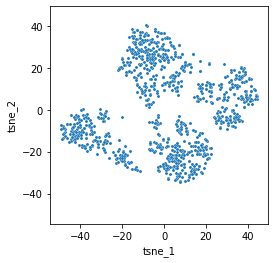

In [37]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

In [38]:
# Split dataset on train and test
x_train, x_test, y_train, y_test = train_test_split(tsne_result, y, test_size =0.2, shuffle = True, stratify = y)

In [39]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        82
           1       0.89      0.85      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

